In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pydataset import data
from sqlalchemy import create_engine

In [4]:
def get_connection(db, user, host, password):
    from sqlalchemy import create_engine
    url = f'mysql+pymysql://{user}:{password}@{host}/numbers'
    return create_engine(url)

#### 1. Use pandas to convert the following list to a numeric series:
python ['$796,459.41', '$278.60', '$482,571.67', '$4,503,915.98', '$2,121,418.3', '$1,260,813.3', '$87,231.01', '$1,509,175.45', '$4,138,548.00', '$2,848,913.80', '$594,715.39', '$4,789,988.17', '$4,513,644.5', '$3,191,059.97', '$1,758,712.24', '$4,338,283.54', '$4,738,303.38', '$2,791,759.67', '$769,681.94', '$452,650.23']

In [5]:
prices = ['$796,459.41', '$278.60', '$482,571.67', '$4,503,915.98', '$2,121,418.3', '$1,260,813.3', '$87,231.01', '$1,509,175.45', '$4,138,548.00', '$2,848,913.80', '$594,715.39', '$4,789,988.17', '$4,513,644.5', '$3,191,059.97', '$1,758,712.24', '$4,338,283.54', '$4,738,303.38', '$2,791,759.67', '$769,681.94', '$452,650.23']

prices = pd.Series(prices).str.replace('$', '').str.replace(',', '')

prices.astype('float')

0      796459.41
1         278.60
2      482571.67
3     4503915.98
4     2121418.30
5     1260813.30
6       87231.01
7     1509175.45
8     4138548.00
9     2848913.80
10     594715.39
11    4789988.17
12    4513644.50
13    3191059.97
14    1758712.24
15    4338283.54
16    4738303.38
17    2791759.67
18     769681.94
19     452650.23
dtype: float64

In [6]:
number_list = pd.Series(['$796,459.41', '$278.60', '$482,571.67', '$4,503,915.98', '$2,121,418.3', '$1,260,813.3', '$87,231.01', '$1,509,175.45', '$4,138,548.00', '$2,848,913.80', '$594,715.39', '$4,789,988.17', '$4,513,644.5', '$3,191,059.97', '$1,758,712.24', '$4,338,283.54', '$4,738,303.38', '$2,791,759.67', '$769,681.94', '$452,650.23'])
number_list = pd.Series(prices).str.replace('$', '').str.replace(',', '')

number_list.astype('float')

0      796459.41
1         278.60
2      482571.67
3     4503915.98
4     2121418.30
5     1260813.30
6       87231.01
7     1509175.45
8     4138548.00
9     2848913.80
10     594715.39
11    4789988.17
12    4513644.50
13    3191059.97
14    1758712.24
15    4338283.54
16    4738303.38
17    2791759.67
18     769681.94
19     452650.23
dtype: float64

#### 2. Load the mpg dataset. Read the documentation for it, and use the data to answer these questions:

In [7]:
data('mpg', show_doc=True)

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




In [8]:
mpg_df = data('mpg')
mpg_df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


2a. How many rows and columns are there?

In [9]:
print('(rows, columns) = ', mpg_df.shape)

(rows, columns) =  (234, 11)


2b. What are the data types?

In [10]:
mpg_df.dtypes

manufacturer     object
model            object
displ           float64
year              int64
cyl               int64
trans            object
drv              object
cty               int64
hwy               int64
fl               object
class            object
dtype: object

2c. Do any cars have better city mileage than highway mileage?

In [11]:
(mpg_df.cty > mpg_df.hwy).any() # (mpg_df.cty > mpg_df.hwy).sum()

False

2d. Create a column named milelage_difference this column should contain the difference between highway and city milelage for each car.

In [12]:
mpg_df['mileage_difference'] = mpg_df.hwy - mpg_df.cty

In [13]:
mpg_df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,mileage_difference
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10


2e. On average, which manufacturer has the best miles per gallon?

In [14]:
city = mpg_df.groupby('manufacturer').mean()[['cty']].sort_values('cty', ascending=False)
highway = mpg_df.groupby('manufacturer').mean()[['hwy']].sort_values('hwy', ascending=False)
print(city.head())
print(highway.head())

                    cty
manufacturer           
honda         24.444444
volkswagen    20.925926
subaru        19.285714
hyundai       18.642857
toyota        18.529412
                    hwy
manufacturer           
honda         32.555556
volkswagen    29.222222
hyundai       26.857143
audi          26.444444
pontiac       26.400000


In [15]:
"""
# for long lines:
# - store each intermediate calculation in a variable
by_manufacturer = cars[[manufacturer', 'hwy', 'cty']].groupby('manufacturer')']]
avg_by_manufacturer = by_manufacturer.mean()
avg_by_manufacturer.sort_values(by='hwy', ascending=False)

# - backslashes to continue the expression over many lines
mpg_df[['manufacturer', 'hwy', 'cty']]\
    .groupby('manufacturer')\
    .mean()\
    .sort_values(by='hwy', ascending=False)

# - parenthesis
(mpg_df[['manufacturer', 'hwy', 'cty']]
 .groupby('manufacturer')
 .mean()
 .sort_values(by='hwy', ascending=False))
"""

mpg_df[['manufacturer', 'hwy', 'cty']].groupby('manufacturer').mean().sort_values(by='hwy', ascending=False)

,hwy,cty
manufacturer,,
honda,32.555556,24.444444
volkswagen,29.222222,20.925926
hyundai,26.857143,18.642857
audi,26.444444,17.611111
pontiac,26.400000,17.000000
subaru,25.571429,19.285714
toyota,24.911765,18.529412
nissan,24.615385,18.076923
chevrolet,21.894737,15.000000


2f. How many different manufacturers are there?

In [16]:
print('The total of manufacturers are:', pd.value_counts(mpg_df['manufacturer'].values).count())

The total of manufacturers are: 15


In [17]:
mpg_df.manufacturer.nunique()

15

2g. How many different models are there?

In [18]:
print('The total number of models are:', pd.value_counts(mpg_df['model'].values).count())

The total number of models are: 38


In [19]:
mpg_df.model.nunique()

38

2h. Do automatic or manual cars have better miles per gallon?

In [20]:
mpg_df['auto_vs_man'] = mpg_df.trans.str.slice(0,-4)
mpg_df.auto_vs_man.head()

1      auto
2    manual
3    manual
4      auto
5      auto
Name: auto_vs_man, dtype: object

In [21]:
mpg_df['avg'] = (mpg_df.cty + mpg_df.hwy) / 2
mpg_df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,mileage_difference,auto_vs_man,avg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11,auto,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8,manual,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11,manual,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9,auto,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10,auto,21.0


In [22]:
mpg_avg = mpg_df.sort_values('avg', ascending=False)
mpg_avg.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,mileage_difference,auto_vs_man,avg
222,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,9,manual,39.5
213,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,11,manual,38.5
223,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,12,auto,35.0


#### 3. Load the Mammals dataset. Read the documentation for it, and use the data to answer these questions:

In [23]:
data('Mammals', show_doc=True)

Mammals

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Garland(1983) Data on Running Speed of Mammals

### Description

Observations on the maximal running speed of mammal species and their body
mass.

### Usage

    data(Mammals)

### Format

A data frame with 107 observations on the following 4 variables.

weight

Body mass in Kg for "typical adult sizes"

speed

Maximal running speed (fastest sprint velocity on record)

hoppers

logical variable indicating animals that ambulate by hopping, e.g. kangaroos

specials

logical variable indicating special animals with "lifestyles in which speed
does not figure as an important factor": Hippopotamus, raccoon (Procyon),
badger (Meles), coati (Nasua), skunk (Mephitis), man (Homo), porcupine
(Erithizon), oppossum (didelphis), and sloth (Bradypus)

### Details

Used by Chappell (1989) and Koenker, Ng and Portnoy (1994) to illustrate the
fitting of piecewise linear curves.

### Source

Garland, T. (

In [24]:
mammals_df = data('Mammals')
mammals_df.head()

,weight,speed,hoppers,specials
1,6000.0,35.0,False,False
2,4000.0,26.0,False,False
3,3000.0,25.0,False,False
4,1400.0,45.0,False,False
5,400.0,70.0,False,False


3a. How many rows and columns are there?

In [25]:
print('(rows, columns) = ', mammals_df.shape)

(rows, columns) =  (107, 4)


3b. What are the data types?

In [26]:
mammals_df.dtypes

weight      float64
speed       float64
hoppers        bool
specials       bool
dtype: object

3c. What is the the weight of the fastest animal?

In [27]:
# mammals_df.sort_values(by='speed', ascending=False).head(1)
mammals_df.nlargest(1, 'speed')

,weight,speed,hoppers,specials
53,55.0,110.0,False,False


3d. What is the overal percentage of specials?

In [28]:
percent_specials = mammals_df.specials.sum()/mammals_df.specials.count()
print('{:.2%} are specials'.format(percent_specials))

9.35% are specials


3e. How many animals are hoppers that are above the median speed? What percentage is this?

In [29]:
hoppers = mammals_df[mammals_df.hoppers]
median_speed = mammals_df.speed.median()

n_hoppers = hoppers[hoppers.speed > median_speed].shape[0]

percent_hoppers = n_hoppers / mammals_df.shape[0]

print('There are {} hoppers, which is {:.2%} of the total'.format(n_hoppers, percent_hoppers))

There are 7 hoppers, which is 6.54% of the total


#### 4. Getting data from SQL databases

4a. Create a function named get_db_url. It should accept a username, hostname, password, and database name and return a url formatted like in the examples in this lesson.

In [30]:
def get_db_url(db, user, host, password):
  from sqlalchemy import create_engine
#   url = f'mysql+mysqlconnector://{user}:{password}@{host}/{db}'
  url = f'mysql+pymysql://{user}:{password}@{host}/{db}'
  return create_engine(url)

In [31]:
from env import user, host, password

4b. Use your function to obtain a connection to the employees database.

In [32]:
import pandas as pd
conn = get_db_url('employees', user, host, password)

4c. Read the employees and titles tables into two separate data frames

In [33]:
employees = pd.read_sql('SELECT * FROM employees', conn)
titles = pd.read_sql('SELECT * FROM titles', conn)

In [32]:
title_sql = pd.read_sql('select * from titles', conn)
title_sql.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


4d. Visualize the number of employees with each title.

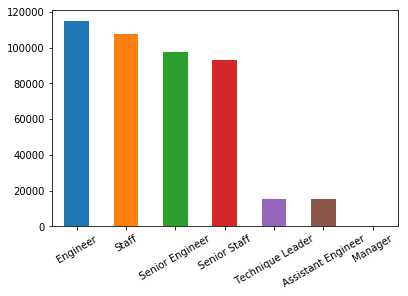

In [34]:
titles.title.value_counts().plot.bar()
plt.xticks(rotation=30)
plt.subplots_adjust(left=0.15, right=0.95, top=0.95, bottom=0.2)

4e. Visualize how frequently employees change titles.

In [35]:
titles.emp_no.value_counts().value_counts()

1    159754
2    137256
3      3014
Name: emp_no, dtype: int64

In [ ]:
title_sql.plot.bar(rot=30)

4f. Use the .join method to join the employees and titles data frames together

In [37]:
employees_with_titles = employees.join(titles, on='emp_no', lsuffix='_emp', how='inner')
print(employees_with_titles.groupby('title')[['hire_date']].max())

                     hire_date
title                         
Assistant Engineer  2000-01-06
Engineer            1999-12-31
Senior Engineer     2000-01-08
Senior Staff        2000-01-23
Staff               2000-01-11
Technique Leader    2000-01-03


4g. For each title, find the hire date of the employee that was hired most recently with that title.

In [38]:
print(pd.read_sql('select e.hire_date, t.title \
                from employees as e \
                join titles as t on e.emp_no = t.emp_no \
                group by t.title, e.hire_date \
                order by e.hire_date \
                limit 10', conn))

print('\n')

    hire_date             title
0  1985-01-01           Manager
1  1985-01-01             Staff
2  1985-01-01      Senior Staff
3  1985-01-01  Technique Leader
4  1985-01-14      Senior Staff
5  1985-01-14           Manager
6  1985-02-01          Engineer
7  1985-02-01  Technique Leader
8  1985-02-01   Senior Engineer
9  1985-02-01      Senior Staff




#### 5. Explore the data from the chipotle database. Write a python script that will use this data to answer the following questions:

In [40]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from pydataset import data # data is a function that gives a dataframe
from sqlalchemy import create_engine
from env import user, host, password

In [41]:
def get_db_url(db, user, host, password):
    from sqlalchemy import create_engine
    url = f'mysql+pymysql://{user}:{password}@{host}/{db}'
    return create_engine(url)

In [37]:
conn = get_db_url('chipotle', user, host, password)

In [38]:
chipotle_df = pd.read_sql('select * from orders;', conn)

chipotle_df['item_price'] = chipotle_df['item_price'].replace( '[\$,)]','', regex=True ).astype(float)

chipotle_df.head(3)

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,2.39
1,2,1,1,Izze,[Clementine],3.39
2,3,1,1,Nantucket Nectar,[Apple],3.39


5a. What is the total price for each order?

In [39]:
chipotle_df.groupby(['order_id']).sum().head()

,id,quantity,item_price
order_id,,,
1,10,4,11.56
2,5,2,16.98
3,13,2,12.67
4,17,2,21.00
5,21,2,13.70


5b. What are the most popular 3 items?

In [40]:
chipotle_df.head(3)

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,2.39
1,2,1,1,Izze,[Clementine],3.39
2,3,1,1,Nantucket Nectar,[Apple],3.39


5c. Which item has produced the most revenue?

In [41]:
chipotle_df.groupby(['item_name'])['item_price'].agg(['sum']).sort_values(by='sum', ascending=False).head(1)

,sum
item_name,
Chicken Bowl,7342.73
